# Chargement des données & transformations

In [136]:
from  utils.regressor_tools import to_tsfresh_format
from sklearn.model_selection import train_test_split 
from tsfresh import *
from tsfresh.feature_extraction import extract_features, MinimalFCParameters
from tsfresh.utilities.dataframe_functions import add_sub_time_series_index
from utils.data_loader import load_from_tsfile_to_dataframe
from utils.data_processor import *
from utils.regressor import create_regressor 
from utils.regressor_tools import *
from utils.regressor_tools import process_data
from utils.tools import create_directory,min_len
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from utils.ts_tools import transform_data
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from math import sqrt
from sklearn.model_selection import GridSearchCV


# Chargement des données 

In [ ]:
# chargement des données 
X_train, y_train = load_from_tsfile_to_dataframe("data/LiveFuelMoistureContent_TEST.ts")
X_test, y_test = load_from_tsfile_to_dataframe("data/LiveFuelMoistureContent_TRAIN.ts")
X = pd.concat([X_train,X_test],axis=0)
Y = pd.concat([pd.Series(y_train),pd.Series(y_test)],axis=0)
Data = pd.concat([X,Y],axis=1)
x = process_data(X,min_len(X))


# Description des données 

In [201]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5003 entries, 0 to 3492
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dim_0   5003 non-null   object
 1   dim_1   5003 non-null   object
 2   dim_2   5003 non-null   object
 3   dim_3   5003 non-null   object
 4   dim_4   5003 non-null   object
 5   dim_5   5003 non-null   object
 6   dim_6   5003 non-null   object
dtypes: object(7)
memory usage: 312.7+ KB


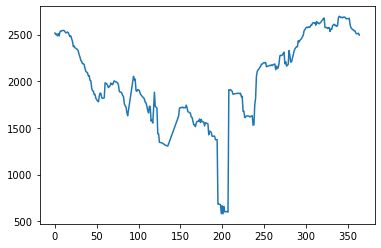

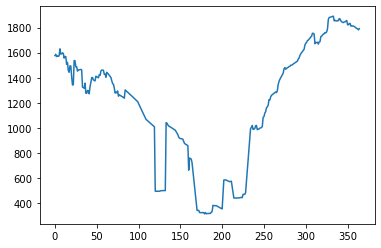

In [198]:
X.iloc[0,0].plot()
plt.show()
X.iloc[1,0].plot()
plt.show()
# X.iloc[0,2].plot()
# plt.show()
# X.iloc[0,3].plot()
# plt.show()
# X.iloc[0,4].plot()
# plt.show()
# X.iloc[0,5].plot()
# plt.show()
# X.iloc[0,6].plot()
# plt.show()

# Modèls

In [196]:
_X ,_Y = transform_data(X,Y,normalise="none",features_extraction=True)
_X_train , _Y_train, _X_test , _Y_test = train_test_split(_X,_Y,test_size=0.3) 

Feature Extraction: 100%|██████████| 10/10 [00:17<00:00,  1.70s/it]


In [205]:
_X

,0__sum_values,0__mean,0__root_mean_square,0__median,1__median,6__minimum,6__median,0__maximum,0__absolute_maximum,4__minimum,...,4__maximum,4__absolute_maximum,5__standard_deviation,5__variance,2__maximum,2__absolute_maximum,6__standard_deviation,6__variance,3__standard_deviation,3__variance
0,727318.00,1992.652055,2049.251842,1970.0,2474.0,867.0,1313.0,2697.0,2697.0,495.0,...,5875.0,5875.0,724.867173,5.254324e+05,4213.0,4213.0,833.658205,6.949860e+05,837.381066,7.012070e+05
1,430173.00,1178.556164,1269.584366,1275.0,2117.0,636.0,952.0,1890.0,1890.0,304.0,...,4957.0,4957.0,1239.211819,1.535646e+06,3701.0,3701.0,1294.705521,1.676262e+06,1246.268685,1.553186e+06
2,449229.00,1230.764384,1261.878879,1252.0,1876.0,323.0,597.0,1747.0,1747.0,164.0,...,465.0,465.0,383.791431,1.472959e+05,2831.0,2831.0,165.380022,2.735055e+04,130.263634,1.696861e+04
3,813230.69,2228.029288,2320.557580,2435.0,3417.0,948.0,1518.0,3089.0,3089.0,559.0,...,7974.0,7974.0,1459.055083,2.128842e+06,4676.0,4676.0,1789.249261,3.201413e+06,1837.270229,3.375562e+06
4,808141.00,2214.084932,2236.754395,2097.0,3038.0,1061.0,1306.0,2863.0,2863.0,537.0,...,1064.0,1064.0,355.849100,1.266286e+05,4187.0,4187.0,263.009770,6.917414e+04,187.919852,3.531387e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4998,368680.00,1010.082192,1025.059822,997.0,1991.0,336.0,519.0,1415.0,1415.0,147.0,...,354.0,354.0,588.199927,3.459792e+05,3408.0,3408.0,85.613549,7.329680e+03,70.578632,4.981343e+03
4999,354823.00,972.117808,985.577632,950.0,1972.0,339.0,487.0,1254.0,1254.0,172.0,...,321.0,321.0,647.153656,4.188079e+05,3644.0,3644.0,77.563914,6.016161e+03,96.327564,9.279000e+03
5000,349823.00,958.419178,968.778074,973.0,1932.0,371.0,488.0,1372.0,1372.0,176.0,...,346.0,346.0,637.785515,4.067704e+05,3544.0,3544.0,80.824512,6.532602e+03,64.759929,4.193848e+03
5001,356665.00,977.164384,992.080583,945.0,1939.0,107.0,490.0,1357.0,1357.0,41.0,...,354.0,354.0,628.446195,3.949446e+05,3603.0,3603.0,95.219677,9.066787e+03,67.774107,4.593330e+03


# Hyperparameters tuning 

In [176]:
search_params = {
                "n_estimators": [100],
                "max_depth": [5, 10]
                # "learning_rate": [0.1, 0.05, 0.01]
            }
regressor = GridSearchCV(estimator=RandomForestRegressor(),param_grid=search_params,cv=5,scoring=make_scorer(mean_squared_error))
regressor.fit(_X,_Y)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10], 'n_estimators': [100]},
             scoring=make_scorer(mean_squared_error))

In [184]:
regressor.cv_results_.keys()
# regressor.cv_results_

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [195]:
rf_reg = regressor.set(regressor.best_params_)

AttributeError: 'GridSearchCV' object has no attribute 'set'

ValueError: setting an array element with a sequence.